In [1]:
import pandas as pd
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier

In [3]:
pd.set_option( 'display.max_rows', 1000)
pd.set_option( 'display.max_columns', 500)
pd.set_option( 'display.width', 100)

In [4]:
telecomDf = pd.read_csv( 'telecom_churn_data.csv' )

In [5]:
telecomDf.head( )

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

### Inspecting the Telecom Data

In [6]:
telecomDf.shape

(99999, 226)

In [7]:
telecomDf.describe( )

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Creating Derived columns - 

#### Total recharge data amount -

In [8]:
# for 6th month - 
telecomDf[ "total_rech_data_amt_6" ] = telecomDf[ "total_rech_data_6" ] * telecomDf[ 'av_rech_amt_data_6' ]

In [9]:
# for 7th month - 
telecomDf[ "total_rech_data_amt_7" ] = telecomDf[ "total_rech_data_7" ] * telecomDf[ 'av_rech_amt_data_7' ]

In [10]:
# for 8th month - 
telecomDf[ "total_rech_data_amt_8" ] = telecomDf[ "total_rech_data_8" ] * telecomDf[ 'av_rech_amt_data_8' ]

In [11]:
#for 9th month -
telecomDf[ "total_rech_data_amt_9" ] = telecomDf[ "total_rech_data_9" ] * telecomDf[ 'av_rech_amt_data_9' ]

As we have calculated a new derived field based on total_rech_data_* and av_rech_amt_data_*, we can drop these columns for all the 4 month

In [12]:
colsToDrop = [ "total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9' ]

telecomDf.drop( colsToDrop, axis=1, inplace=True )

Inspecting the new shape of the dataframe - 

In [13]:
telecomDf.shape

(99999, 222)

#### Calculating the average recharge amount for months 6 and 7 -

In [14]:
avgRechAmt6n7 = ( telecomDf[ 'total_rech_data_amt_6' ].fillna( 0 ) + telecomDf[ 'total_rech_amt_6' ].fillna( 0 ) + telecomDf['total_rech_amt_7'].fillna( 0 ) + telecomDf[ 'total_rech_data_amt_7' ].fillna( 0 ) ) / 2.0

#### Calculating the 70th percentile - 

In [15]:
pc70 = np.percentile( avgRechAmt6n7, 70.0 )

In [16]:
pc70

478.0

#### Deriving the High Value Customers - 

In [17]:
highValueCustDf = telecomDf[ avgRechAmt6n7 > pc70 ]

In [18]:
highValueCustDf.head( )

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2

In [19]:
highValueCustDf.shape

(29953, 222)

## Data Cleaning and EDA - 

### Dropping columns which have only 1 unique value - 

In [20]:
colsToDrop = highValueCustDf.columns[ highValueCustDf.apply(pd.Series.nunique) == 1 ]

In [21]:
colsToDrop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [22]:
highValueCustDf.drop( list( colsToDrop ), axis = 1, inplace = True )

In [23]:
# Inspecting the shape of the dataframe - 
highValueCustDf.shape

(29953, 206)

### Changing the names of columns which use 'aug', 'jul', 'jun', 'sep' to _8, _7, _6, _9 respectively - 

In [24]:
highValueCustDf.columns[ ( highValueCustDf.columns.str.contains('jul') ) | ( highValueCustDf.columns.str.contains('jun') ) | ( highValueCustDf.columns.str.contains('aug') ) | ( highValueCustDf.columns.str.contains('sep') ) ]  

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [25]:
highValueCustDf.rename( columns = { 'jun_vbc_3g': 'vbc_3g_6', 
                                    'jul_vbc_3g': 'vbc_3g_7', 
                                    'aug_vbc_3g': 'vbc_3g_8', 
                                    'sep_vbc_3g': 'vbc_3g_9'}, inplace=True )

### Checking the Object columns to see if they can be converted to Float, Int or Date - 

This is being performed as the data seems to contain numeric data only.

In [26]:
highValueCustDf.columns[ highValueCustDf.dtypes == 'object' ]

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')

In [27]:
#### All these columns are date columns, thus we can convert them to date dtype

colsToConvert = [ 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9' ]

for col in colsToConvert :
    highValueCustDf[ col ] =  pd.to_datetime( highValueCustDf[ col ] ) 

In [28]:
highValueCustDf[ colsToConvert ].dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

### Handling Missing Values - 

In [29]:
telecomDf.columns[ round( 100*( telecomDf.isnull( ).sum( )/len( telecomDf.index ) ), 2 ) > 30 ]

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8',
       'total_rech_data_amt_9'],
      dtype='object')

As columns related to month 9 are required for prediction, we will keep those columns and drop the rest.

In [30]:
missingValCols = telecomDf.columns[ round( 100*( telecomDf.isnull( ).sum( )/len( telecomDf.index ) ), 2 ) > 30 ]

In [31]:
missingValColsToDrop = list( set( missingValCols ) - set( [ i for i in list( missingValCols ) if '_9' in i ] ) )

In [32]:
highValueCustDf.drop( missingValColsToDrop, axis = 1, inplace = True )

In [33]:
# Inspecting the shape of the Dataframe - 
highValueCustDf.shape

(29953, 179)

### Handling Correlated Data - 

In [34]:
cor = highValueCustDf.corr()

In [35]:
cor = cor.stack( )

In [36]:
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

vol_3g_mb_6            monthly_3g_6             0.601325
monthly_3g_6           vol_3g_mb_6              0.601325
total_ic_mou_7         loc_ic_t2t_mou_7         0.601655
loc_ic_t2t_mou_7       total_ic_mou_7           0.601655
count_rech_3g_9        arpu_2g_9                0.602243
arpu_2g_9              count_rech_3g_9          0.602243
total_og_mou_8         onnet_mou_9              0.603694
onnet_mou_9            total_og_mou_8           0.603694
total_rech_amt_8       arpu_6                   0.604021
arpu_6                 total_rech_amt_8         0.604021
roam_og_mou_7          roam_og_mou_8            0.605131
roam_og_mou_8          roam_og_mou_7            0.605131
offnet_mou_8           offnet_mou_6             0.605156
offnet_mou_6           offnet_mou_8             0.605156
total_ic_mou_8         loc_ic_t2t_mou_8         0.605215
loc_ic_t2t_mou_8       total_ic_mou_8           0.605215
std_og_t2m_mou_8       std_og_mou_9             0.606321
std_og_mou_9           std_og_t

#### removing the correlated columns - 

In [37]:
colsToDrop = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

In [38]:
highValueCustDf.drop( colsToDrop, axis = 1, inplace = True )

In [39]:
# Inspecting the shape of the dataframe - 
highValueCustDf.shape

(29953, 124)

### Tag Chuners and Non Churners - 

Churners and Non Churners are tagged on the basis of the following columns -
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

These columns basically indicate whether the customer has made any outgoing calls or recieved any calls, or has used internet services.
If these services are not used then the customer is tagged as 1 ( churn ) else 0 ( non churn )

In [40]:
highValueCustDf[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9' ]].head( )

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [41]:
np.where( highValueCustDf[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9' ]].sum( axis = 1 ) == 0, 1, 0)
                                        

array([1, 1, 0, ..., 0, 0, 0])

In [42]:
highValueCustDf[ 'churn' ] = np.where( highValueCustDf[['total_ic_mou_9', 'total_og_mou_9', 
                                                        'vol_2g_mb_9', 'vol_3g_mb_9' ]].sum( axis = 1 ) == 0, 1, 0)

In [43]:
# Checking whether the churners have been identified correctly or not - 
highValueCustDf[[ 'mobile_number', 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'churn' ]].head( )

,mobile_number,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn
0,7000842753,0.00,0.00,0.00,0.00,1
7,7000701601,0.00,0.00,0.00,0.00,1
8,7001524846,34.91,142.18,0.00,0.00,0
21,7002124215,252.61,1031.53,0.00,0.00,0
23,7000887461,127.48,127.63,13.93,314.74,0


As we can see that -
- Customer with mobile number *'7000842753'* has not made/recieved any calls and also has not used any internet services.Thus he has been marked as 'Churn'.
- Customer with mobile number *'7001524846'* has made/recieved calls hence has been marked as non churn 

### Removing all the columns related to the Churn Phase i.e. month '9' -

In [44]:
churnPhaseCols = [ i for i in highValueCustDf.columns if '_9' in i ]

In [45]:
churnPhaseCols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_rech_data_amt_9']

In [46]:
highValueCustDf.drop( churnPhaseCols, inplace = True, axis = 1 )

In [47]:
# Inspecting the dataframe after dropping churn phase columns - 
highValueCustDf.shape

(29953, 87)

### Creating some more Derived Features - 

In [48]:
cols = highValueCustDf.filter(regex='_6|_7').columns.str[:-2]

In [49]:
for i in cols :
    col6 = i + '_6'
    col7 = i + '_7'
    newCol = 'avg' + i + '6n7'
    highValueCustDf[ newCol ] = ( highValueCustDf[ col6 ] + highValueCustDf[ col7 ] ) / 2

#### Dropping the columns that were used in deriving the new cols - 

In [50]:
highValueCustDf.drop( highValueCustDf.filter(regex='_6|_7').columns, axis = 1, inplace = True )

In [51]:
# Inspecting the shape of the dataframe - 
highValueCustDf.shape

(29953, 59)

### Converting aon in months - 

In [52]:
highValueCustDf[ 'aon' ] = highValueCustDf[ 'aon' ] / 30

### Checking the Churn Distribution -

Text(0.5, 1.0, 'Churn Distribution')

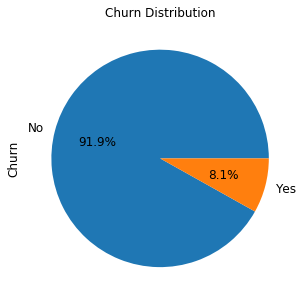

In [53]:
ax = ( highValueCustDf['churn'].value_counts()*100.0 /len(highValueCustDf)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

As we can see, there is a class imbalance as 92% of the data refers to non churners.
Thus we will have to handle this skewed data while building the model.

### Plotting the distribution of the Customers Tenure -

Text(0.5, 1.0, 'Customers by their tenure')

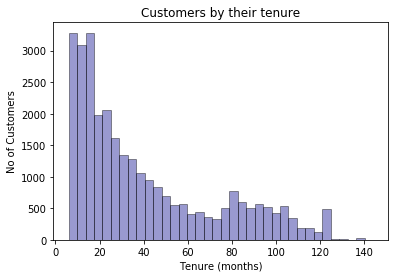

In [54]:
ax = sns.distplot( highValueCustDf[ 'aon' ], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 6})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by their tenure')

Maximum number of customers are present for a smaller tenure.

#### Checking the relationship between tenure and churn -

In [55]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_range = pd.cut( highValueCustDf['aon'], tn_range, labels=tn_label)

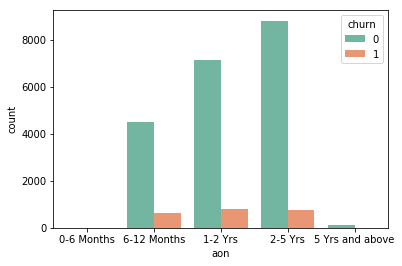

In [56]:
sns.countplot( x = tenure_range, data=highValueCustDf, palette="Set2", hue = "churn")

The churning % is almost similar for the tenure of 6-12 months, 1-2 yrs and 2-5 yrs

### Correlating Churn with other columns - 

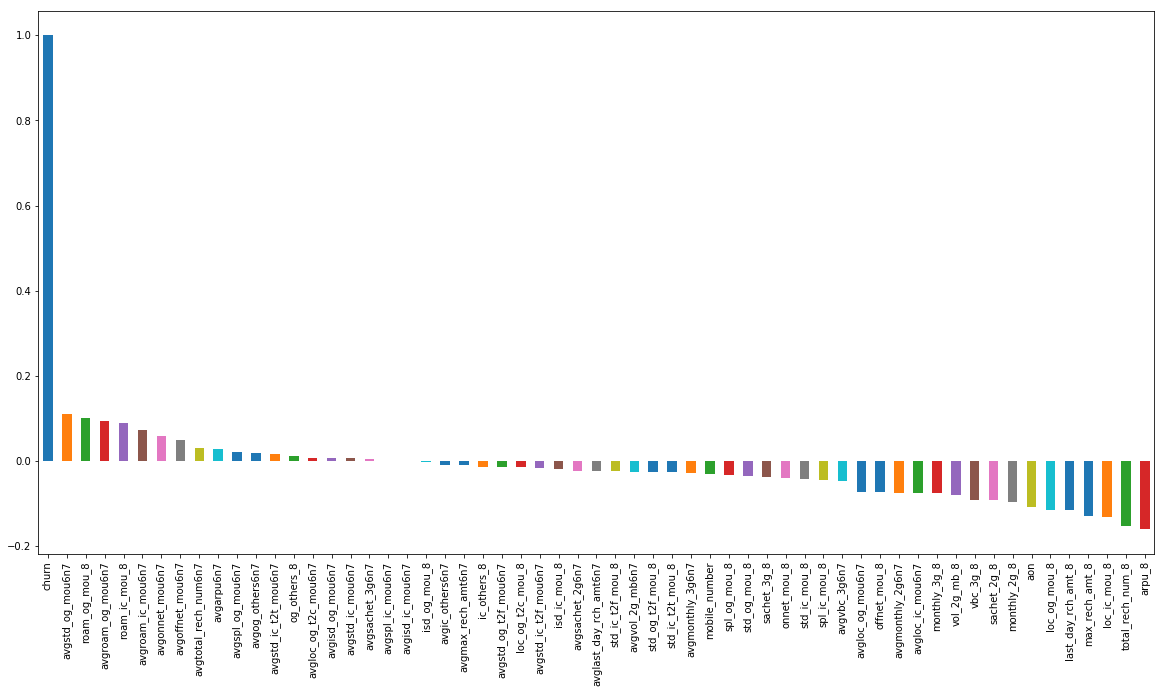

In [57]:
plt.figure(figsize=(20,10))
highValueCustDf.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

avgstd_og_mou6n7, roam_og_mou_8, avgroam_og_mou_6n7 seem to be positively correlated, whereas arpu_8, total_rech_num_8 seem to be negatively correlated.

In [58]:
sorted( highValueCustDf.columns.tolist( ) )

['aon',
 'arpu_8',
 'avgarpu6n7',
 'avgic_others6n7',
 'avgisd_ic_mou6n7',
 'avgisd_og_mou6n7',
 'avglast_day_rch_amt6n7',
 'avgloc_ic_mou6n7',
 'avgloc_og_mou6n7',
 'avgloc_og_t2c_mou6n7',
 'avgmax_rech_amt6n7',
 'avgmonthly_2g6n7',
 'avgmonthly_3g6n7',
 'avgoffnet_mou6n7',
 'avgog_others6n7',
 'avgonnet_mou6n7',
 'avgroam_ic_mou6n7',
 'avgroam_og_mou6n7',
 'avgsachet_2g6n7',
 'avgsachet_3g6n7',
 'avgspl_ic_mou6n7',
 'avgspl_og_mou6n7',
 'avgstd_ic_mou6n7',
 'avgstd_ic_t2f_mou6n7',
 'avgstd_ic_t2t_mou6n7',
 'avgstd_og_mou6n7',
 'avgstd_og_t2f_mou6n7',
 'avgtotal_rech_num6n7',
 'avgvbc_3g6n7',
 'avgvol_2g_mb6n7',
 'churn',
 'ic_others_8',
 'isd_ic_mou_8',
 'isd_og_mou_8',
 'last_day_rch_amt_8',
 'loc_ic_mou_8',
 'loc_og_mou_8',
 'loc_og_t2c_mou_8',
 'max_rech_amt_8',
 'mobile_number',
 'monthly_2g_8',
 'monthly_3g_8',
 'offnet_mou_8',
 'og_others_8',
 'onnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'sachet_2g_8',
 'sachet_3g_8',
 'spl_ic_mou_8',
 'spl_og_mou_8',
 'std_ic_mou_8',
 '

### Relation between Tenure and Revenue - 

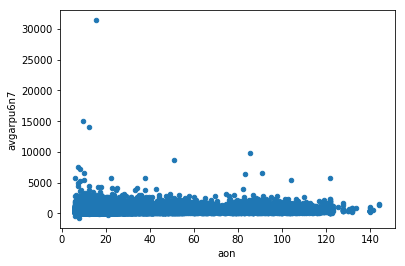

In [59]:
highValueCustDf[['aon', 'avgarpu6n7']].plot.scatter(x = 'aon',
                                                              y='avgarpu6n7')

 ### Relation between Tenure and Churn - 

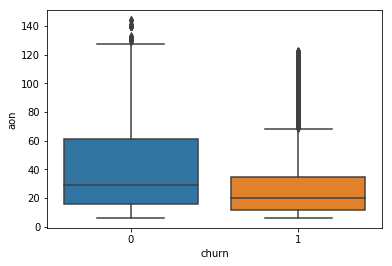

In [60]:
sns.boxplot( x = highValueCustDf.churn, y = highValueCustDf.aon )

We can see that the median for Non churning customers is higher than the churning customers.


## Modelling - 

In [61]:
modelDf = highValueCustDf.copy( )

In [62]:
modelDf.drop( 'mobile_number', axis = 1 , inplace = True )

In [63]:
modelDf.isna( ).sum( axis = 0 )

arpu_8                       0
onnet_mou_8               1172
offnet_mou_8              1172
roam_ic_mou_8             1172
roam_og_mou_8             1172
loc_og_t2c_mou_8          1172
loc_og_mou_8              1172
std_og_t2f_mou_8          1172
std_og_mou_8              1172
isd_og_mou_8              1172
spl_og_mou_8              1172
og_others_8               1172
loc_ic_mou_8              1172
std_ic_t2t_mou_8          1172
std_ic_t2f_mou_8          1172
std_ic_mou_8              1172
spl_ic_mou_8              1172
isd_ic_mou_8              1172
ic_others_8               1172
total_rech_num_8             0
max_rech_amt_8               0
last_day_rch_amt_8           0
vol_2g_mb_8                  0
monthly_2g_8                 0
sachet_2g_8                  0
monthly_3g_8                 0
sachet_3g_8                  0
aon                          0
vbc_3g_8                     0
churn                        0
avgarpu6n7                   0
avgonnet_mou6n7            779
avgoffne

In [64]:
modelDf.fillna( 0, inplace = True )

In [65]:
X = modelDf.drop( 'churn', axis = 1 )
y = modelDf['churn']

In [66]:
#inspecting shape of X and y - 
print( X.shape )
print( y.shape)

(29953, 57)
(29953,)


### Scaling the Dataframe - 

In [67]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Splitting the dataframe into training and testing data sets - 

In [68]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1 )

In [69]:
print( 'Shape of training data set ', X_train.shape )
print( 'Shape of test data set ', X_test.shape )


Shape of training data set  (20967, 57)
Shape of test data set  (8986, 57)


### Balancing the data set -
As we had noticed, the data is skewed towards Non Churning Customers. 

In [70]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,y_tr = sm.fit_sample(X_train,y_train)

### Principal Component Analysis -

In [71]:
X_tr,y_tr = sm.fit_sample( X_train,y_train )

In [72]:
from sklearn.decomposition import PCA

#### Creating PCA - 

In [73]:
pca = PCA(random_state=100)

#### Fitting and Transforming using PCA -

In [74]:
pca.fit( X_tr )  # using the new balanced X_train data
X_tr_pca   = pca.fit_transform( X_tr )   # fit and transform the training dataset
X_test_pca = pca.transform( X_test )     # fit and transform the test dataset

### Logistic Regression - 

In [75]:
lr_pca = LogisticRegression(  )
lr_pca.fit( X_tr_pca, y_tr )                      

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the training values - 

In [76]:
y_train_pred = lr_pca.predict( X_tr_pca )

#### Building the Confusion MAtrix for the training data set -

In [77]:
confusion_matrix( y_tr, y_train_pred )

array([[15897,  3367],
       [ 2641, 16623]])

#### Checking the Training Accuracy score -

In [78]:
accuracy_score( y_tr, y_train_pred )

0.84406146179402

#### Predicting the values -

In [79]:
y_pred = lr_pca.predict( X_test_pca )

#### Building the Confusion Matrix - 

In [80]:
confusion_matrix( y_test, y_pred )

array([[6786, 1470],
       [ 142,  588]])

#### Checking the Accuracy of the model - 

In [81]:
accuracy_score( y_test, y_pred )

0.8206098375250389

Accuracy of the training data set is higher than the test data accuracy.
Lets tune PCA

### Plotting the Scree Plot -

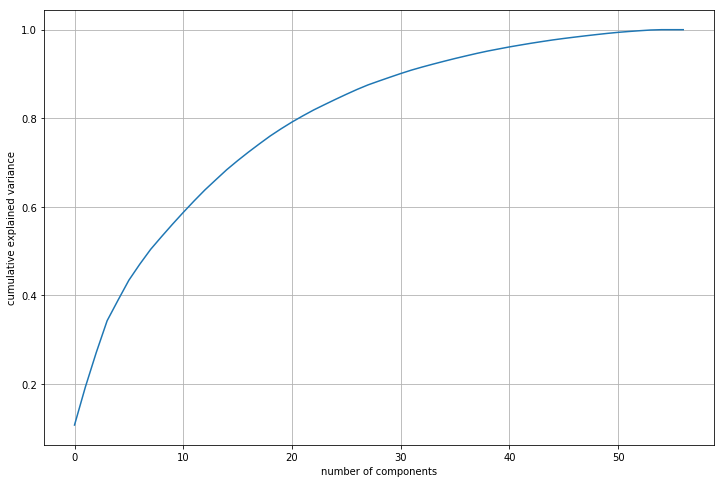

In [82]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(True)
plt.show()

On the basis of the Scree plot, we have decided to go with 35 PCA components as it can explain more than 90% variance in the data.

### Building the new PCA Model -
PCA with 35 components

In [83]:
pca_35 = PCA( n_components = 35 )

#### Fit and Transform the data-

In [84]:
pca_35.fit( X_tr )  # using the new balanced X_train data
# fit and transform the training dataset
X_tr_pca_35   = pca_35.fit_transform( X_tr )  
# fit the test dataset
X_test_pca_35 = pca_35.transform( X_test )     

### Building the Logistic Regression model -

In [85]:
lr_pca_35 = LogisticRegression(  )
lr_pca_35.fit( X_tr_pca_35, y_tr )                      

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting the values based on the training dataset - 

In [86]:
y_train_pred_35 = lr_pca_35.predict( X_tr_pca_35 )

In [87]:
confusion = confusion_matrix( y_tr, y_train_pred_35 )

In [88]:
accuracy_score( y_tr, y_train_pred_35 )

0.8316549003322259

#### Calculating Specificity, Sensitivity for Training Data-

In [89]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
sensivity = TP / float( TP + FN )
print( sensivity )

0.8433347176079734


In [91]:
specificity = TN / float( TN + FP )
print( specificity)

0.8199750830564784


#### Predicting Values using Test Data - 

In [92]:
y_test_pred_35 = lr_pca_35.predict( X_test_pca_35 )

In [93]:
#Confusion matrix -
confusion_test = confusion_matrix( y_test, y_test_pred_35 )
print( confusion_test )

[[6790 1466]
 [ 147  583]]


In [94]:
# Accuracy score - 
accuracy_test = accuracy_score( y_test, y_test_pred_35 )
print( accuracy_test )

0.8204985533051413


#### Calculating Specificity, Sensitivity for Test Data-

In [95]:
TP = confusion_test[1,1] # true positive
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [96]:
sensivity = TP / float( TP + FN )
print( sensivity )

0.7986301369863014


In [97]:
specificity = TN / float( TN + FP )
print( specificity)

0.8224321705426356


## Random Forest - 

### Random Forest with defaul Hyperparameters

In [98]:
lasso = Lasso( )

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#Cross Validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit( X_tr, y_tr )


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   15.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [99]:
cv_results = pd.DataFrame( model_cv.cv_results_ )
cv_results.head( )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.074779,0.463110,0.001056,0.000104,0.0001,{'alpha': 0.0001},-0.379521,-0.383075,-0.333682,-0.383584,-0.377529,-0.371478,0.019032,1,-0.294436,-0.295238,-0.309686,-0.320169,-0.321908,-0.308288,0.011754
1,1.015040,0.432676,0.001336,0.000520,0.001,{'alpha': 0.001},-0.380765,-0.384174,-0.334931,-0.386370,-0.380384,-0.373324,0.019325,2,-0.295715,-0.296558,-0.311004,-0.321388,-0.323090,-0.309551,0.011711
2,0.063777,0.002948,0.001000,0.000046,0.01,{'alpha': 0.01},-0.396156,-0.398987,-0.347336,-0.412261,-0.406838,-0.392315,0.023200,3,-0.310184,-0.310945,-0.325343,-0.333586,-0.335373,-0.323086,0.010772
3,0.047590,0.009819,0.001119,0.000153,0.05,{'alpha': 0.05},-0.471461,-0.467546,-0.410490,-0.510546,-0.508920,-0.473791,0.036432,4,-0.378131,-0.377247,-0.393209,-0.390377,-0.391854,-0.386163,0.006983
4,0.038892,0.004437,0.001337,0.000246,0.1,{'alpha': 0.1},-0.535036,-0.530383,-0.465559,-0.579390,-0.579054,-0.537882,0.041744,5,-0.432833,-0.433667,-0.448774,-0.435715,-0.436282,-0.437454,0.005801


### Selecting the optimal alpha value -

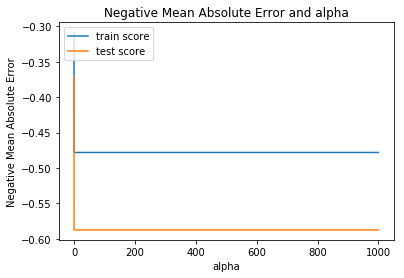

In [100]:
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


Looking at the graph, we have selected the alpha as 0, which is same as default alpha. Thus there is no need to rebuild the Lasso Model.

#### Rebuilding the model with alpha as 0 -

In [102]:
rfc = RandomForestClassifier( )

In [103]:
# Fitting the Random Forest Classifier using the training set created by PCA
rfc.fit( X_tr_pca_35, y_tr )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
# Predicting the values - 
predictions = rfc.predict( X_test_pca_35 )

In [105]:
print( classification_report( y_test, predictions ) )

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      8256
           1       0.44      0.53      0.48       730

    accuracy                           0.91      8986
   macro avg       0.70      0.73      0.72      8986
weighted avg       0.92      0.91      0.91      8986



In [106]:
# Confusion Matrix - 
print( confusion_matrix( y_test, predictions ) )

[[7775  481]
 [ 345  385]]


In [107]:
# Accuracy score -
print( accuracy_score( y_test, predictions ) )

0.9080792343645671


### Hyperparamter Tuning - 

#### Tuning max_depth parameter -

In [181]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True )
rf.fit( X_tr_pca_35, y_tr )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [182]:
scores = rf.cv_results_

In [183]:
pd.DataFrame( scores )

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.277676,0.016290,0.006383,0.000287,2,{'max_depth': 2},0.778614,0.759019,0.754866,0.776148,0.751558,0.764042,0.011173,4,0.794530,0.761469,0.760918,0.778762,0.751200,0.769376,0.015396
1,0.761327,0.011068,0.008511,0.000169,7,{'max_depth': 7},0.843758,0.850506,0.854918,0.857903,0.852414,0.851900,0.004768,3,0.866362,0.862663,0.862241,0.863831,0.860823,0.863184,0.001858
2,1.169813,0.006185,0.010789,0.000817,12,{'max_depth': 12},0.904360,0.906566,0.911757,0.914612,0.913292,0.910117,0.003968,2,0.950101,0.950490,0.954610,0.956005,0.953316,0.952904,0.002297
3,1.437841,0.042868,0.012936,0.000504,17,{'max_depth': 17},0.933039,0.935245,0.935375,0.935505,0.939901,0.935813,0.002237,1,0.982934,0.981669,0.983324,0.983226,0.983325,0.982896,0.000630


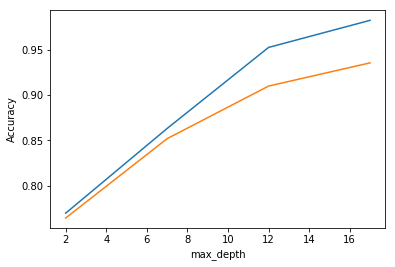

In [184]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"].tolist( ), scores["mean_train_score"] )
plt.plot(scores["param_max_depth"].tolist( ), scores["mean_test_score"] )
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

As we can see that the accuracy is constantly increases till max_depth of **7**, after that the test accuracy reduces before increasing again .
Thus the max_depth can be set as 7

#### Tuning n_estimators -

In [185]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'n_estimators': range( 1, 50, 10 ) }

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier( max_depth = 4 )


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True )
rf.fit( X_tr_pca_35, y_tr )

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [186]:
# scores of GridSearch CV
scores = rf.cv_results_

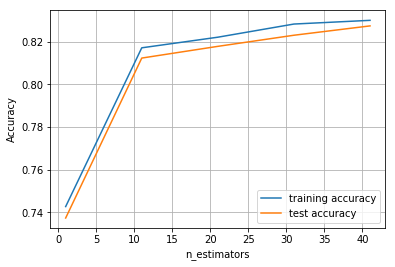

In [188]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"].tolist( ), 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"].tolist( ), 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid( True )
plt.show()

We can select n_estimators as **12** 

#### Tuning max_features -

In [191]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [5, 10, 15, 20, 25, 30, 35 ]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score = True )
rf.fit(X_tr_pca_35, y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [192]:
scores = rf.cv_results_

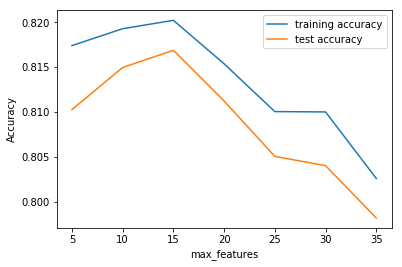

In [193]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



We can set the max_features as **15**

In [201]:
len( X_tr_pca_35 )

38528

### Finding optimal values using GridSearchCV -

In [203]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [ 5, 7, 15, 20 ],
    'min_samples_leaf': range(50, 500, 15),
    'min_samples_split': range(100, 700, 50 ),
    'n_estimators': [ 500, 800 ], 
    'max_features': [ 10, 15, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)


# Fit the grid search to the data
grid_search.fit( X_tr_pca_35, y_tr)

Fitting 3 folds for each of 8640 candidates, totalling 25920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

### Fitting the final model with the best parameters obtained from hyperparameter tuning- 

In [204]:
# model with the best hyperparameters

model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)


In [213]:
# fit
model_rf.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=15, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [214]:
# predict
predictions_rf = model_rf.predict( X_test )

#### Deriving the classification report -

In [215]:
print(classification_report(y_test,predictions_rf ))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8256
           1       0.76      0.44      0.55       730

    accuracy                           0.94      8986
   macro avg       0.86      0.71      0.76      8986
weighted avg       0.94      0.94      0.94      8986



#### Confusion Matrix -

In [216]:
print(confusion_matrix(y_test,predictions_rf))

[[8157   99]
 [ 412  318]]


#### Accuracy Score - 

In [217]:
accuracy_score( y_test, predictions_rf )

0.9431337636323169

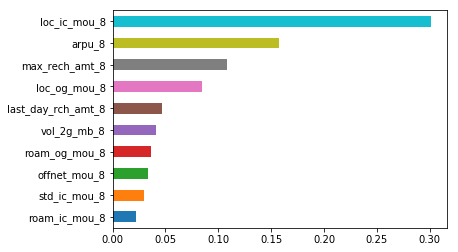

In [230]:
X = modelDf.drop( 'churn', axis = 1 )
# Scaling all the variables to a range of 0 to 1
#from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
X.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

Most important features for Churn / Non Churn Prediction are -
- loc_ic_mou_8
- arpu_8
- max_rech_amt_8
- loc_og_mou_8
- last_day_rch_amt_8
- vol_2g_mb_8